In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Read the image in color format
image = cv2.imread('img3.png')

In [3]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Get image dimensions
h, w = gray.shape

In [5]:
# Define the identity transformation matrix
mat_identity = np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)

In [6]:
# Apply identity transform
img_identity = cv2.warpAffine(gray, mat_identity, (w, h))

In [7]:
# Apply reflection transform
img_reflect = cv2.flip(gray, 0)

In [8]:
# Apply translation
tx, ty = 50, 50
mat_translate = np.float32([[1, 0, tx], [0, 1, ty]])
img_translate = cv2.warpAffine(gray, mat_translate, (w, h))

In [9]:
# Apply scaling
s_x, s_y = 0.75, 0.75
mat_scale = np.float32([[s_x, 0, 0], [0, s_y, 0]])
img_scale = cv2.warpAffine(gray, mat_scale, (w, h))

In [10]:
# Rotate the image by 30° counter-clockwise
theta = np.pi / 6
mat_rotate = cv2.getRotationMatrix2D((w / 2, h / 2), np.degrees(theta), 1)
img_rotate = cv2.warpAffine(gray, mat_rotate, (w, h))

In [11]:
# Apply shear transform
lambda1 = 0.5
mat_shear = np.float32([[1, lambda1, 0], [lambda1, 1, 0]])
img_shear = cv2.warpAffine(gray, mat_shear, (w, h))

In [12]:
# Combine all transformations together
# First, apply translation
combined_mat = cv2.warpAffine(gray, mat_translate, (w, h))
# Then, apply rotation
combined_mat = cv2.warpAffine(combined_mat, mat_rotate, (w, h))
# Then, apply shear
combined_mat = cv2.warpAffine(combined_mat, mat_shear, (w, h))
# Finally, apply scaling
combined_mat = cv2.warpAffine(combined_mat, mat_scale, (w, h))

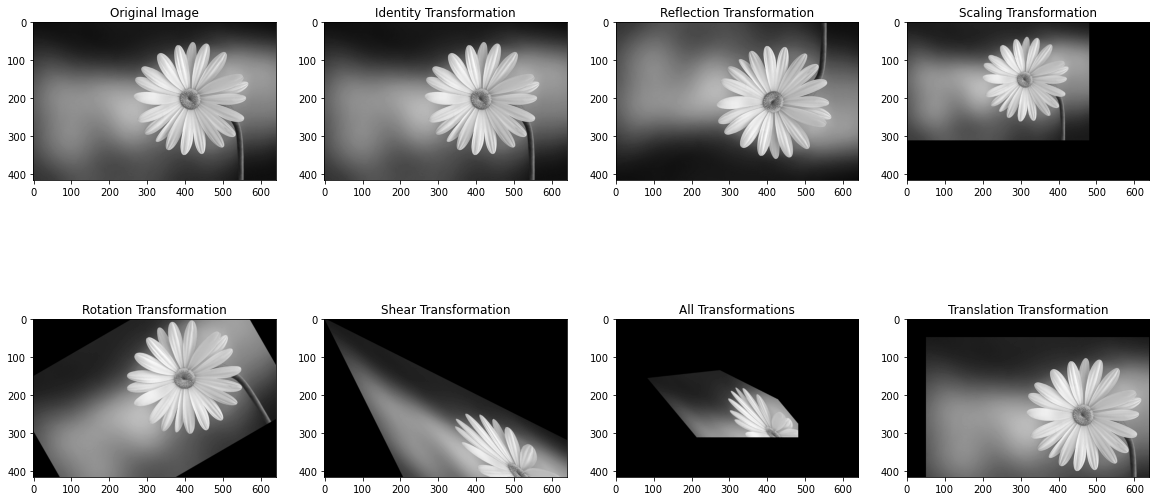

In [13]:
# Increase the size of the plots
plt.figure(figsize=(20, 10))

# Plotting
plt.subplot(2, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(img_identity, cmap='gray')
plt.title('Identity Transformation')

plt.subplot(2, 4, 3)
plt.imshow(img_reflect, cmap='gray')
plt.title('Reflection Transformation')

plt.subplot(2, 4, 4)
plt.imshow(img_scale, cmap='gray')
plt.title('Scaling Transformation')

plt.subplot(2, 4, 5)
plt.imshow(img_rotate, cmap='gray')
plt.title('Rotation Transformation')

plt.subplot(2, 4, 6)
plt.imshow(img_shear, cmap='gray')
plt.title('Shear Transformation')

plt.subplot(2, 4, 7)
plt.imshow(combined_mat, cmap='gray')
plt.title('All Transformations')

plt.subplot(2, 4, 8)
plt.imshow(img_translate, cmap='gray')
plt.title('Translation Transformation')

plt.show()